In [ ]:
import pandas as pd
import numpy as np
import glob
import joblib
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

Accuracy: 0.5317


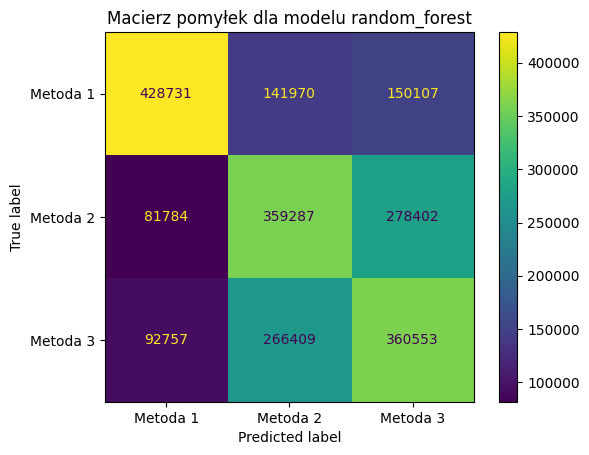

x1: 0.123
y1: 0.128
x2: 0.122
y2: 0.125
length: 0.121
center_x: 0.128
center_y: 0.130
distance_from_center: 0.123


In [ ]:
method_1_files=glob.glob("metoda_1_*.csv")
method_2_files=glob.glob("metoda_2_*.csv")
method_3_files=glob.glob("metoda_3_*.csv")

def load_and_process(filepaths,method_label,has_center=False):
    dfs=[]
    for path in filepaths:
        df=pd.read_csv(path)
        if not has_center:
            df['center_x']=(df['x1']+df['x2'])/2
            df['center_y']=(df['y1']+df['y2'])/2
        df['distance_from_center']=np.sqrt(df['center_x']**2+df['center_y']**2)
        df['method']=method_label
        dfs.append(df)
    return pd.concat(dfs,ignore_index=True)

df1=load_and_process(method_1_files,method_label=1,has_center=False)
df2=load_and_process(method_2_files,method_label=2,has_center=True)
df3=load_and_process(method_3_files,method_label=3,has_center=True)
data=pd.concat([df1,df2,df3],ignore_index=True)

features=['x1','y1','x2','y2','length','center_x','center_y','distance_from_center']
X=data[features]
y=data['method']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

model=RandomForestClassifier(n_estimators=100,random_state=42)
model.fit(X_train,y_train)

y_pred=model.predict(X_test)
acc=accuracy_score(y_test,y_pred)
print(f'Accuracy: {acc:.4f}')

cm=confusion_matrix(y_test,y_pred)
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['Metoda 1','Metoda 2','Metoda 3'])
disp.plot()
plt.title('Macierz pomyłek dla modelu random_forest')
plt.savefig('macierz_pomyłek_dla_random_forest.png',dpi=300,bbox_inches='tight')
plt.show()

importance_of_features=model.feature_importances_
for f, imp in zip(features, importance_of_features):
    print(f'{f}: {imp:.3f}')

In [ ]:
joblib.dump(model,'model_random_forest.pkl')

Model zapisany
